In [109]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [110]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [111]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [112]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [113]:
# Declare a Base using `automap_base()`
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [114]:
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [115]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [116]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [117]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [118]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [119]:
# Find the most recent date in the data set.

latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [126]:
last_year = last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [128]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

yearprcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()
print(yearprcp)

[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31', 0.13), (

In [123]:
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

In [194]:
yearprcp_df = pd.DataFrame(yearprcp)
yearprcp_df.set_index(['date'])
yearprcp_df.sort_values(by=['date'])
yearprcp_df



,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


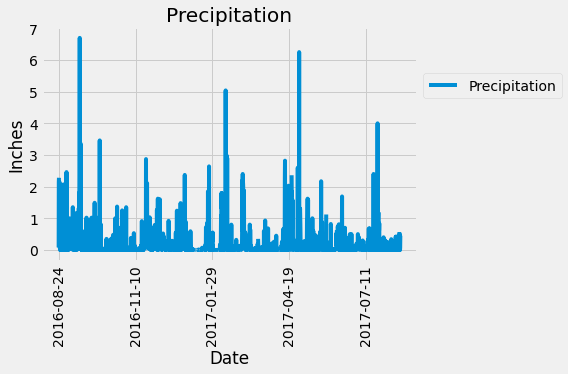

In [189]:
# Use Pandas Plotting with Matplotlib to plot the data

yearprcp_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation")
plt.xticks(rotation=90)
plt.legend(["Precipitation"], loc='center', bbox_to_anchor=(1.2, .75))


In [192]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearprcp_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [200]:
# Design a query to calculate the total number stations in the dataset

session.query(func.count(Station.id)).all()

[(9)]

In [209]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activestn = session.query(Measurement.station, func.count(Measurement.tobs))\
    .group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
activestn

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [211]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#func.min, func.max, func.avg 

actcalc = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
actcalc


[(54.0, 85.0, 71.66378066378067)]

In [213]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram




# temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
#     filter(Measurement.station == busiest).\
#     filter(Measurement.date > last_year).\
#     order_by(Measurement.date).all()


NameError: name 'busiest' is not defined

# Close session

In [ ]:
# Close Session
session.close()